In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Absenteeism.csv')

# Display top of dataframe
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Absent
0,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,0,0,98,178,31,0,0
1,20,0,9,2,4,260,50,11,36,"241,476",...,1,4,1,0,0,65,168,23,0,0
2,29,0,9,2,4,225,26,9,28,"241,476",...,1,1,0,0,2,69,169,24,0,0
3,11,0,9,3,4,289,36,13,33,"241,476",...,1,2,1,0,1,90,172,30,0,0
4,36,0,9,3,4,118,13,18,50,"241,476",...,1,1,1,0,0,98,178,31,0,0


In [3]:
data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Absent
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,94.587838,...,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324,0.366216
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,3.779313,...,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998,0.482095
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000,0.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,95.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000,0.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000,1.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,...,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000,1.000000


# Q1 - Breakdown of employees with ecessive absences vs not

A small Function, which displays existence of value 1 in absence column

In [5]:

def check_balance(dframe, label):
    label_count_abs = data[label].value_counts()
    label_count_percent = data[label].value_counts(normalize=True) * 100
    print(label_count_percent,'\n')
    print(label_count_abs)
    ax = label_count_abs.plot.bar(rot=0)
    return()
    

0    63.378378
1    36.621622
Name: Absent, dtype: float64 

0    469
1    271
Name: Absent, dtype: int64


()

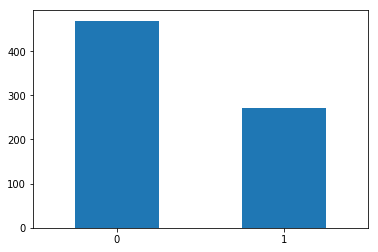

In [6]:
check_balance(data,label='Absent')

Before going further, I eliminate spaces from the column names

In [11]:
data.rename(columns={'Distance from Residence to Work': 'Distance', 'Service time': 'Service_Time', 'Social smoker': 'Social_Smoker', 'Social drinker': 'Social_Drinker', 'Body mass index': 'BMI', 'absent': 'Absent'}, inplace=True)

In [12]:
relevant = ['Service_Time', 'Distance', 'Son', 'Social_Drinker', 'Social_Smoker', 'Pet', 'BMI', 'Absent']

In [13]:
data_clean = data[relevant]

In [14]:
data_clean.head()

,Service_Time,Distance,Son,Social_Drinker,Social_Smoker,Pet,BMI,Absent
0,18,13,1,1,0,0,31,0
1,11,50,4,1,0,0,23,0
2,9,26,1,0,0,2,24,0
3,13,36,2,1,0,1,30,0
4,18,13,1,1,0,0,31,0


# Q2 Fit a full Logistic Regression for the data

statsmodel with formula takes the y and X in form y_column ~ + x1 + x2 + x3 .... I decide to make this more programmatic and crete variable for it.

In [15]:
# Column Names for both y and X are recoreded in a list.

data_vars = data_clean.columns.values.tolist()
y=['Absent']
X=[i for i in data_vars if i not in y]

function to create a string as variable for statsmodel, based on y and X lists

In [17]:
#function to create a string as variable for statsmodel, based on y and X lists

def create_string(y_in, X_in):
    u = 0
    string =  y_in[0] + '~'

    for i in X_in:
        if (u == 0):
            string += ' '
            string += i
            u += 1
        else:
            string += ' + '
            string += i
            
    return(string)

In [18]:
stats_string = create_string(y,X)

In [20]:
#to double check
stats_string

'Absent~ Service_Time + Distance + Son + Social_Drinker + Social_Smoker + Pet + BMI'

Run a logistic regression with statsmodel

In [21]:
import statsmodels.formula.api as sm 

In [22]:
model= sm.logit(formula=stats_string, data= data_clean).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.633139
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Absent   No. Observations:                  740
Model:                          Logit   Df Residuals:                      732
Method:                           MLE   Df Model:                            7
Date:                Wed, 13 May 2020   Pseudo R-squ.:                 0.03619
Time:                        19:13:00   Log-Likelihood:                -468.52
converged:                       True   LL-Null:                       -486.11
Covariance Type:            nonrobust   LLR p-value:                 1.033e-05
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.6766      0.573     -1.181      0.238      -1.799       0.446
Service_Time      -0.0509      0.026     -1.975      0.048      -0.101      -0.000
Distance          -0.0151      0.006     -2.391      0.017      -0.027      -0.003
Son                0.2295      0.075      3.054      0.002       0.082       0.377
Social_Drinker     0.6275      0.201      3.125      0.002       0.234       1.021
Social_Smoker      0.4648      0.316      1.470      0.141      -0.155       1.084
Pet                0.0652      0.073      0.897      0.370      -0.077       0.208
BMI                0.0193      0.023      0.839      0.401      -0.026       0.064
==================================================================================
"""

In [205]:
column_name = list(data.columns) 
relevant = ['Distance from Residence to Work','Service time','Son','Social drinker','Social smoker','Pet','Body mass index', 'Absent']
Aggregate_Dict = {}
for col in relevant:
    if col in ['Absent']:
        Aggregate_Dict.update( {col : 'sum'} )
    else:
        Aggregate_Dict.update( {col : 'first'} )

In [23]:
confusion = model.pred_table()
columns_confusion = ['0_Predicted', '1_Predicted']

In [24]:
conf_df = pd.DataFrame(confusion, columns=columns_confusion)
conf_df

,0_Predicted,1_Predicted
0,439.0,30.0
1,232.0,39.0


# Accuracy Assesment

In [25]:
def accuracy_scores(conf_array):
    True_N = conf_array[0,0]
    False_N = conf_array[0,1]
    True_P = conf_array[1,1]
    False_P = conf_array[1,0]
    Real_P = np.sum(conf_array[:,1])
    Real_N = np.sum(conf_array[:,0])
    total = np.sum(conf_array)
    miss_rate = 100*((False_N +False_P)/total)
    accuracy = 100*((True_N + True_P)/total)
    recall = 100 * True_P / Real_P
    precision = 100 * True_N / Real_N
    print('Missclassification Rate is', miss_rate)
    print('Accuracy is', accuracy)
    print('Sensitivity (T_p/Act_p) is', recall)
    print('Specifity (T_n/Act_n) is', precision)
    return(miss_rate, accuracy)

In [26]:
accuracy_scores(confusion)

Missclassification Rate is 35.4054054054054
Accuracy is 64.5945945945946
Sensitivity (T_p/Act_p) is 56.52173913043478
Specifity (T_n/Act_n) is 65.424739195231


(35.4054054054054, 64.5945945945946)

We reduce BMI, the least significant feature

In [27]:
relevant_new = ['Service_Time', 'Distance', 'Son', 'Social_Drinker', 'Social_Smoker', 'Pet']
stats_string = create_string(y,relevant_new)
stats_string

'Absent~ Service_Time + Distance + Son + Social_Drinker + Social_Smoker + Pet'

In [28]:
model= sm.logit(formula=stats_string, data= data_clean).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.633616
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Absent   No. Observations:                  740
Model:                          Logit   Df Residuals:                      733
Method:                           MLE   Df Model:                            6
Date:                Wed, 13 May 2020   Pseudo R-squ.:                 0.03546
Time:                        19:28:32   Log-Likelihood:                -468.88
converged:                       True   LL-Null:                       -486.11
Covariance Type:            nonrobust   LLR p-value:                 5.441e-06
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.2827      0.327     -0.864      0.388      -0.924       0.359
Service_Time      -0.0407      0.023     -1.789      0.074      -0.085       0.004
Distance          -0.0158      0.006     -2.518      0.012      -0.028      -0.004
Son                0.2176      0.074      2.950      0.003       0.073       0.362
Social_Drinker     0.6633      0.196      3.381      0.001       0.279       1.048
Social_Smoker      0.3941      0.304      1.295      0.195      -0.202       0.990
Pet                0.0811      0.070      1.153      0.249      -0.057       0.219
==================================================================================
"""

In [29]:
confusion = model.pred_table()
columns_confusion = ['0_Predicted', '1_Predicted']
conf_df = pd.DataFrame(confusion, columns=columns_confusion)
conf_df

,0_Predicted,1_Predicted
0,405.0,64.0
1,219.0,52.0


In [30]:
accuracy_scores(confusion)

Missclassification Rate is 38.24324324324324
Accuracy is 61.75675675675676
Sensitivity (T_p/Act_p) is 44.827586206896555
Specifity (T_n/Act_n) is 64.90384615384616


(38.24324324324324, 61.75675675675676)

Now, we eliminate the Pet feature

In [31]:
relevant_new = ['Service_Time', 'Distance', 'Son', 'Social_Drinker', 'Social_Smoker']
stats_string = create_string(y,relevant_new)
stats_string

'Absent~ Service_Time + Distance + Son + Social_Drinker + Social_Smoker'

In [32]:
model= sm.logit(formula=stats_string, data= data_clean).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.634520
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Absent   No. Observations:                  740
Model:                          Logit   Df Residuals:                      734
Method:                           MLE   Df Model:                            5
Date:                Wed, 13 May 2020   Pseudo R-squ.:                 0.03409
Time:                        19:29:47   Log-Likelihood:                -469.54
converged:                       True   LL-Null:                       -486.11
Covariance Type:            nonrobust   LLR p-value:                 3.531e-06
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.1282      0.298     -0.430      0.667      -0.713       0.456
Service_Time      -0.0534      0.020     -2.650      0.008      -0.093      -0.014
Distance          -0.0136      0.006     -2.275      0.023      -0.025      -0.002
Son                0.2204      0.074      2.991      0.003       0.076       0.365
Social_Drinker     0.6499      0.197      3.299      0.001       0.264       1.036
Social_Smoker      0.4563      0.301      1.515      0.130      -0.134       1.047
==================================================================================
"""

In [33]:
confusion = model.pred_table()
columns_confusion = ['0_Predicted', '1_Predicted']
conf_df = pd.DataFrame(confusion, columns=columns_confusion)
conf_df

,0_Predicted,1_Predicted
0,412.0,57.0
1,224.0,47.0


# Proceed with Q4

We also eliminate the Social Smoker feature

In [34]:
relevant_new = ['Service_Time', 'Distance', 'Son', 'Social_Drinker']
stats_string = create_string(y,relevant_new)
stats_string

'Absent~ Service_Time + Distance + Son + Social_Drinker'

In [35]:
model= sm.logit(formula=stats_string, data= data_clean).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.636060
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Absent   No. Observations:                  740
Model:                          Logit   Df Residuals:                      735
Method:                           MLE   Df Model:                            4
Date:                Wed, 13 May 2020   Pseudo R-squ.:                 0.03174
Time:                        19:30:43   Log-Likelihood:                -470.68
converged:                       True   LL-Null:                       -486.11
Covariance Type:            nonrobust   LLR p-value:                 3.270e-06
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.1403      0.297     -0.472      0.637      -0.722       0.442
Service_Time      -0.0488      0.020     -2.456      0.014      -0.088      -0.010
Distance          -0.0136      0.006     -2.290      0.022      -0.025      -0.002
Son                0.2407      0.072      3.321      0.001       0.099       0.383
Social_Drinker     0.5989      0.194      3.089      0.002       0.219       0.979
==================================================================================
"""

In [36]:
confusion = model.pred_table()
columns_confusion = ['0_Predicted', '1_Predicted']
conf_df = pd.DataFrame(confusion, columns=columns_confusion)
conf_df


,0_Predicted,1_Predicted
0,418.0,51.0
1,226.0,45.0


In [37]:
accuracy_scores(confusion)

Missclassification Rate is 37.432432432432435
Accuracy is 62.56756756756757
Sensitivity (T_p/Act_p) is 46.875
Specifity (T_n/Act_n) is 64.90683229813665


(37.432432432432435, 62.56756756756757)

# ROC

In [39]:
data_clean.head()

,Service_Time,Distance,Son,Social_Drinker,Social_Smoker,Pet,BMI,Absent
0,18,13,1,1,0,0,31,0
1,11,50,4,1,0,0,23,0
2,9,26,1,0,0,2,24,0
3,13,36,2,1,0,1,30,0
4,18,13,1,1,0,0,31,0


In [40]:
relevant_new

['Service_Time', 'Distance', 'Son', 'Social_Drinker']

In [41]:
y

['Absent']

In [42]:
X_Train = data_clean[relevant_new]
y_train = data_clean[y]

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [44]:
#solver and C set to not use regularization and ... details in bookmarks

logreg = LogisticRegression(C=1e8, solver='lbfgs')
logreg.fit(X_Train, y_train.values.ravel())

LogisticRegression(C=100000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
print(logreg.coef_)
print(logreg.intercept_)

[[-0.04875289 -0.01364083  0.24076969  0.59872335]]
[-0.14077747]


In [46]:
y_hat = logreg.predict(X_Train)

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_hat)
print(confusion_matrix)

[[418  51]
 [226  45]]


In [48]:
accuracy_scores(confusion_matrix)

Missclassification Rate is 37.432432432432435
Accuracy is 62.56756756756757
Sensitivity (T_p/Act_p) is 46.875
Specifity (T_n/Act_n) is 64.90683229813665


(37.432432432432435, 62.56756756756757)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_hat))

              precision    recall  f1-score   support

           0       0.65      0.89      0.75       469
           1       0.47      0.17      0.25       271

    accuracy                           0.63       740
   macro avg       0.56      0.53      0.50       740
weighted avg       0.58      0.63      0.57       740



Area under the Curve 0.6333448728943578


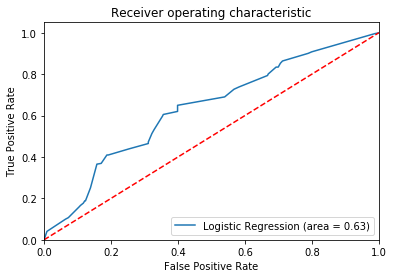

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train, logreg.predict(X_Train))
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_Train)[:,1])
print('Area under the Curve', auc(fpr,tpr))
plt.figure()
#Seems that the roc_auc_score is a bit off when not normal distributed
#plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc(fpr,tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()